# Loading the data set & Exploratory Data Analysis

In [1]:
# Import the required libraries
import os

def read_files(file_path):
   with open(file_path, 'r') as file:
      return file.read()
        
def read_folder(folder_path):
    files=[]
    # Change the directory
    os.chdir(folder_path)
    # Iterate over all the files in the directory
    for file in os.listdir():
        if file.endswith('.txt'):
            # Create the filepath of particular file
            file_path =f"{folder_path}/{file}"
            files.append(read_files(file_path))
    return files
        
# Define the location of the directory
neg=read_folder(folder_path=r"C:/Users/Nasser/Anaconda Work/neg/")
pos=read_folder(folder_path=r"C:/Users/Nasser/Anaconda Work/pos/")



In [2]:
print(len(neg))

1000


In [3]:
print(pos[0])

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

In [4]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import os
import codecs
from nltk.stem import PorterStemmer
from sklearn import feature_extraction
from sklearn.metrics.pairwise import cosine_similarity  
import os 
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS
from textblob import Word
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from textblob import TextBlob

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nasser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Nasser\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# Prepare  Data

In [7]:
neg_data=[]
for i in neg:
    temp=[]
    temp.append(i)
    temp.append(0)
    neg_data.append(temp)

print(neg_data[0])

['plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience memb

In [8]:
pos_data=[]
for i in pos:
    temp=[]
    temp.append(i)
    temp.append(1)
    pos_data.append(temp)

print(pos_data[0])

['films adapted from comic books have had plenty of success , whether they\'re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there\'s never really been a comic book like from hell before . \nfor starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid \'80s with a 12-part series called the watchmen . \nto say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . \nthe book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . \nin other words , don\'t dismiss this film because of its source . \nif you can get past the whole comic book thing , you might find another stumbling block in from hell\'s directors , albert and allen hughes . \ngetting the hughes brothers to direct this see

In [9]:
print(len(neg_data))

1000


In [10]:
print(len(pos_data))

1000


In [11]:
data=pos_data+neg_data
np.random.shuffle(data)
print(len(data))

2000


In [12]:
data=pd.DataFrame(data,columns=['review','label'])

In [13]:
print(data.head(10))

                                              review  label
0  i'm a dedicated fan of writer kevin williamson...      0
1  one of my brother's favorite movies is h . b ....      0
2  how many of us would become strippers ? \nfor ...      1
3  everyone knows that old rule , 'never work wit...      0
4  jamaica is a hot vacation spot . \nthe exchang...      1
5  david mamet has long been my favorite screenwr...      1
6  words i thought i'd never write : the sequel t...      0
7  according to hitchcock and various other filmm...      0
8  this well-conceived but ultra sugary coming-of...      0
9  when i saw the trailer for this film , i laugh...      1


In [14]:
print(data.iloc[0].review)

i'm a dedicated fan of writer kevin williamson's work . 
he always finds a clever way to spice up old material with witty dialogue and fresh ideas that stem from his inventive brain . 
with teaching mrs . tingle , his directorial debut , williamson has reached the end of his rope . 
what used to be intelligent about his films is hopelessly stale here . 
the components are all there , including an encouraging premise that all high school students can relate to . 
but where are the thrills ? 
the laughs ? 
both are supposedly absent from this draggy exercise in elaborate revenge . 
and what a shame that is . 
i loved the scream films - heck , i even enjoyed the sci-fi goofiness of the faculty . 
kevin williamson was the reason horror films were such a big draw at the box office . 
teaching mrs . tingle , a black comedy that will leave a gaping void in his optimistic followers , may put an end to his reign . 
or perhaps it will encourage him to spend more time perfecting a script than to 

# ***Data Exploration***

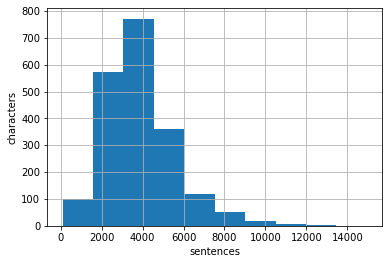

In [15]:
# take a look at the number of characters present in each sentence. This can give us a rough idea about the reviews length.
data['review'].str.len().hist()
plt.xlabel("sentences")
plt.ylabel("characters")
plt.show()

The histogram shows that reviews range from 100 to 12000 characters and generally, it is between 20000 to 70000 characters.

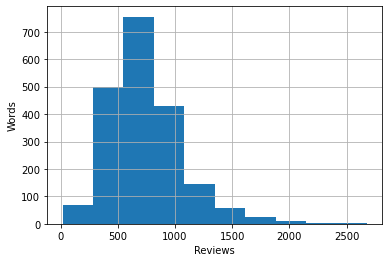

In [16]:
# plot the number of words appearing in each review.
data['review'].str.split().map(lambda x: len(x)).hist()
plt.xlabel("Reviews")
plt.ylabel("Words")
plt.show()

It is clear that the number of words in each review ranges from 2 to 2000 and mostly falls between 250 to 1500 words.

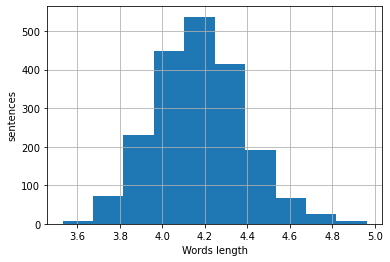

In [17]:
#check the average word length in each sentence.

data['review'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.ylabel("sentences")
plt.xlabel("Words length")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nasser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


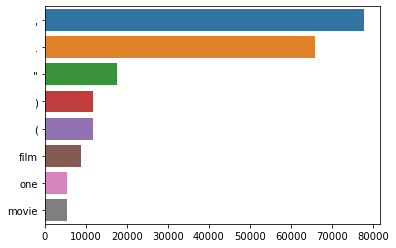

In [18]:
# Most common sentences in data that are not stop words.
from collections import  Counter
import seaborn as sns

nltk.download('stopwords')
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(data['review'])

In [19]:
# N-gram exploration with n = 2,3

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

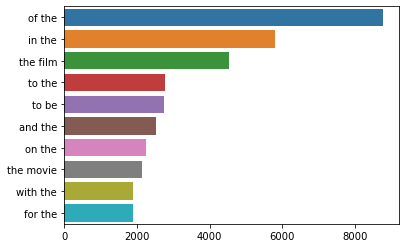

In [20]:
# N-gram exploration with n = 2
top_n_bigrams = get_top_ngram(data['review'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

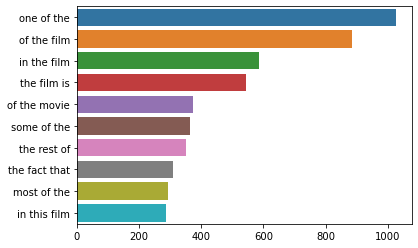

In [21]:
# N-gram exploration with n = 3
top_tri_grams=get_top_ngram(data['review'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

# Data Preprocessing


* Case Normalization
* Remove Stopwords
* Stemming & Lemmatization
* Text Cleaning


In [22]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"'s", " ", text)
    text = re.sub(r"'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"'re", " are ", text)
    text = re.sub(r"'d", " would ", text)
    text = re.sub(r"'ll", " will ", text)
    text = re.sub(r"--", "", text)
    text = re.sub("[^a-zA-Z ]", "" , text)
    text = text.strip(' ')
   
    return text

In [23]:
#pre processing steps like lower case, 
data['review'] = data['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

print("\nData after splitting :\n",data.iloc[0].review)
print("\n lenght:  ",len(data.iloc[0].review))


Data after splitting :
 i'm a dedicated fan of writer kevin williamson's work . he always finds a clever way to spice up old material with witty dialogue and fresh ideas that stem from his inventive brain . with teaching mrs . tingle , his directorial debut , williamson has reached the end of his rope . what used to be intelligent about his films is hopelessly stale here . the components are all there , including an encouraging premise that all high school students can relate to . but where are the thrills ? the laughs ? both are supposedly absent from this draggy exercise in elaborate revenge . and what a shame that is . i loved the scream films - heck , i even enjoyed the sci-fi goofiness of the faculty . kevin williamson was the reason horror films were such a big draw at the box office . teaching mrs . tingle , a black comedy that will leave a gaping void in his optimistic followers , may put an end to his reign . or perhaps it will encourage him to spend more time perfecting a sc

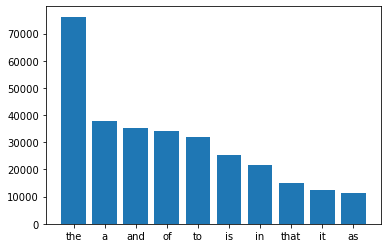

In [24]:
#plot stop words
# Code Snippet for Top Stopwords Barchart

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(data['review'])

In [25]:
#remove stop words
stop = stopwords.words('english')
data['review'] = data['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print("\nData after remove stop words :\n",data.iloc[0].review)
print("\n lenght:  ",len(data.iloc[0].review))


Data after remove stop words :
 i'm dedicated fan writer kevin williamson's work . always finds clever way spice old material witty dialogue fresh ideas stem inventive brain . teaching mrs . tingle , directorial debut , williamson reached end rope . used intelligent films hopelessly stale . components , including encouraging premise high school students relate . thrills ? laughs ? supposedly absent draggy exercise elaborate revenge . shame . loved scream films - heck , even enjoyed sci-fi goofiness faculty . kevin williamson reason horror films big draw box office . teaching mrs . tingle , black comedy leave gaping void optimistic followers , may put end reign . perhaps encourage spend time perfecting script worry directing duties . still faith , fear name kevin williamson may soon forgotten echo past . title character pet project vicious , uncaring history teacher played deliciously over-the-top british actress helen mirren . mrs . tingle basically every student's worst nightmare : h

In [26]:
# stemming && lemma
st = PorterStemmer()
data['review'] = data['review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
data['review'] =data['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print("\nData after stemming :\n",data.iloc[0].review)
print("\n lenght:  ",len(data.iloc[0].review))


Data after stemming :
 i'm dedic fan writer kevin williamson' work . alway find clever way spice old materi witti dialogu fresh idea stem invent brain . teach mr . tingl , directori debut , williamson reach end rope . use intellig film hopelessli stale . compon , includ encourag premis high school student relat . thrill ? laugh ? supposedli absent draggi exercis elabor reveng . shame . love scream film - heck , even enjoy sci-fi goofi faculti . kevin williamson reason horror film big draw box offic . teach mr . tingl , black comedi leav gape void optimist follow , may put end reign . perhap encourag spend time perfect script worri direct duti . still faith , fear name kevin williamson may soon forgotten echo past . titl charact pet project viciou , uncar histori teacher play delici over-the-top british actress helen mirren . mr . tingl basic everi student' worst nightmar : heartless human bent distribut poor mark even hard-work pupil . princip ( michael mckean ) horrifi , unanim despi

In [27]:
# clean text
data['review'] = data['review'].map(lambda com : clean_text(com))
print("\nData after clean text :\n",data.iloc[0].review)
print("\n lenght:  ",len(data.iloc[0].review))




Data after clean text :
 i am  dedic fan writer kevin williamson work  alway find clever way spice old materi witti dialogu fresh idea stem invent brain  teach mr  tingl  directori debut  williamson reach end rope  use intellig film hopelessli stale  compon  includ encourag premis high school student relat  thrill  laugh  supposedli absent draggi exercis elabor reveng  shame  love scream film  heck  even enjoy scifi goofi faculti  kevin williamson reason horror film big draw box offic  teach mr  tingl  black comedi leav gape void optimist follow  may put end reign  perhap encourag spend time perfect script worri direct duti  still faith  fear name kevin williamson may soon forgotten echo past  titl charact pet project viciou  uncar histori teacher play delici overthetop british actress helen mirren  mr  tingl basic everi student worst nightmar  heartless human bent distribut poor mark even hardwork pupil  princip  michael mckean  horrifi  unanim despis among fellow staff member  enjoy

In [28]:
new_data=data

In [29]:
print(new_data.count)

<bound method DataFrame.count of                                                  review  label
0     i am  dedic fan writer kevin williamson work  ...      0
1     one brother favorit movi h  b  halicki  cult f...      0
2     mani u would becom stripper  u  moral reason  ...      1
3     everyon know old rule  never work child anim  ...      0
4     jamaica hot vacat spot  exchang rate encourag ...      1
...                                                 ...    ...
1995  quentin tarantino made  pulp fiction   make gr...      1
1996  accept oscar produc year best pictur winner  s...      1
1997  big courtroom thriller alway captiv america   ...      1
1998  rewatch italian writerdirector dario argento m...      1
1999  capsul  wild jungl woman stori gorilla discov ...      0

[2000 rows x 2 columns]>


In [30]:
print(new_data.iloc[3].review)

everyon know old rule  never work child anim   latest horror flick mimic case  never work child genet enhanc killer animals instead  mimic featur succe noth except mildli engag audienc  film begin new york  see child die mysteri diseas  carri cockroach  dr  susan tyler  sorvino  creat genet enhanc bug  judas breed   howev  design kill cockroach  bug job  cockroach die  terror gone  three year later appear screen  discov juda breed back  bigger ever  readi kill  spin bug  howev  mimic predat  case     human  teach u squish bug  roller coaster ride bug everywher  ton gori death massiv set piec instead turn rather subdu  almost bore movi plod along slow pace  perhap movi tri thought provok  tri avoid predator type movi could easili becom   director writer made wrong move  perfectli suit action fest  director  bought u crono  far superior film  direct film calm  frankli dull movi  excit sequenc  instead lot peopl talk  dialogu intellig  would right  sadli babbl nonsens  fact  script embarr

## Word Cloud

In [31]:
!pip install wordcloud

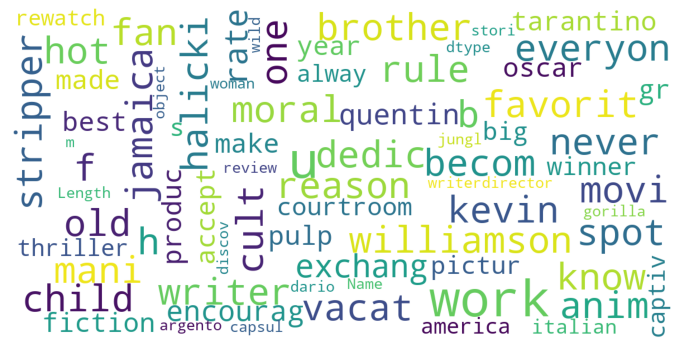

In [32]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data['review'])

### Split Data

In [33]:
#Splitting data into train and validation
from sklearn import model_selection
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(new_data['review'],new_data['label'])

In [34]:
print(type(train_x))

<class 'pandas.core.series.Series'>


In [35]:
print(len(train_x))

1500


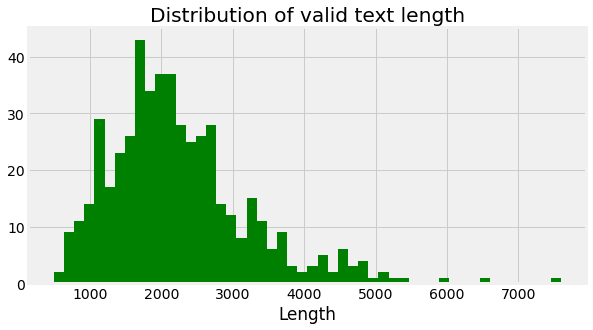

In [36]:
plt.figure(figsize=(10,16))
plt.style.use('fivethirtyeight')

# plt.subplot(3,1,1)
# train_len = [len(train_x.iloc[i]) for i in range(0,len(train_x))]
# plt.hist(train_len,bins=50)
# plt.title('Distribution of train text length')
# plt.xlabel('Length')

plt.subplot(3,1,2)
valid_len = [len(valid_x.iloc[l]) for l in range(0,len(valid_x))]
plt.hist(valid_len,bins=50,color='green')
plt.title('Distribution of valid text length')
plt.xlabel('Length')

plt.show()

In [37]:
print(train_x.shape)

(1500,)


In [38]:
print(valid_x.shape)

(500,)


In [39]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{3,}', max_features=6000)
tfidf_vect.fit(data['review'].tolist())
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)


In [40]:
print(xtrain_tfidf.shape)

(1500, 6000)


In [41]:
print(xvalid_tfidf.shape)

(500, 6000)


In [42]:
print(tfidf_vect.get_feature_names()[:20])

['aaron', 'abandon', 'abbi', 'abil', 'abl', 'aboard', 'abort', 'abound', 'abraham', 'absenc', 'absent', 'absolut', 'absorb', 'absurd', 'abund', 'abus', 'abyss', 'academ', 'academi', 'accent']


C:\Users\Nasser\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
print(xtrain_tfidf.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
print(xtrain_tfidf)

  (0, 5982)	0.023448162100379245
  (0, 5946)	0.01473038061784769
  (0, 5887)	0.05505325788900293
  (0, 5874)	0.02667809033275508
  (0, 5862)	0.0328862505534356
  (0, 5814)	0.016003973342563826
  (0, 5796)	0.05309997590818809
  (0, 5730)	0.029552349029684063
  (0, 5727)	0.030746095056783586
  (0, 5655)	0.05006656211648972
  (0, 5633)	0.04413977709137866
  (0, 5615)	0.026201926810283098
  (0, 5607)	0.05066463923735204
  (0, 5597)	0.030705245097120557
  (0, 5567)	0.03529315123252706
  (0, 5565)	0.03309178405347748
  (0, 5562)	0.01645503481600733
  (0, 5516)	0.03646126620683529
  (0, 5474)	0.061167400848373035
  (0, 5469)	0.06587446775409987
  (0, 5447)	0.1396448913848939
  (0, 5432)	0.05006656211648972
  (0, 5431)	0.04068494216723629
  (0, 5389)	0.021157340030164725
  (0, 5380)	0.019705429888040065
  :	:
  (1499, 513)	0.06065000814776305
  (1499, 511)	0.0640942273349795
  (1499, 458)	0.02760716614903803
  (1499, 452)	0.05664839843744677
  (1499, 422)	0.05931837254356062
  (1499, 421)	0.02

# Model Training and testing

In [45]:
def plot_confusion_matrix(valid_y,predictions):
    import seaborn as sns
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                metrics.confusion_matrix(valid_y,predictions).flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                     metrics.confusion_matrix(valid_y,predictions).flatten()/np.sum(metrics.confusion_matrix(valid_y,predictions))]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(metrics.confusion_matrix(valid_y,predictions), annot=labels,annot_kws={'size': 10}, fmt='', cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.

    plt.show()
    



In [46]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

In [47]:
Model_Names=[]
Model_Accuarcy=[]

In [48]:
def train_model(classifier, xtrain_tfidf, train_y, xvalid_tfidf,valid_y ):
    print(classifier)
    classifier.fit(xtrain_tfidf, train_y)
    predictions = classifier.predict(xvalid_tfidf)
    accuracy= metrics.accuracy_score(predictions, valid_y)
    print ("Accuracy: ", accuracy)
    #Evaluation: Confusion matrix and Precision and Recall

#     print("Confusion matrix:",metrics.confusion_matrix(valid_y,predictions))
#     print(" report:",metrics.classification_report(valid_y,predictions))
    
    Check=True
    for x in Model_Names:
        if x==str(classifier):
            Check=False
    if Check:
        # fit the training dataset on the classifier
        Model_Names.append(str(classifier))
        Model_Accuarcy.append(accuracy)
    plot_confusion_matrix(predictions, valid_y)
    
    return classifier
    

LogisticRegression(C=2.0)
Accuracy:  0.832


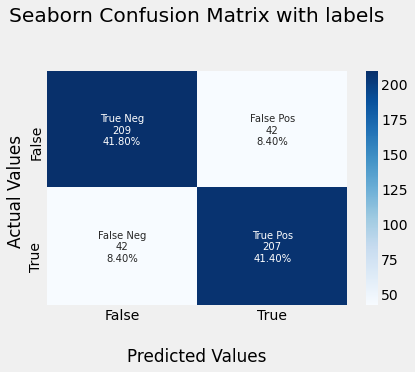

In [49]:
#print("LogisticRegression with default values(penalty='l2', C=2.0, solver='lbfgs')")
classifier=train_model(linear_model.LogisticRegression(C=2.0), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)

LogisticRegression with default values(penalty='l2', C=10.0, solver='lbfgs')
LogisticRegression(C=10.0)
Accuracy:  0.838


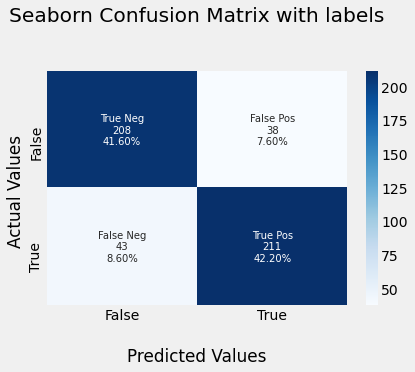

In [50]:
print("LogisticRegression with default values(penalty='l2', C=10.0, solver='lbfgs')")
classifier=train_model(linear_model.LogisticRegression(C=10.0), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)

LogisticRegression with default values(penalty='l2', C=10.0, solver='lbfgs')
LogisticRegression(C=15.0)
Accuracy:  0.838


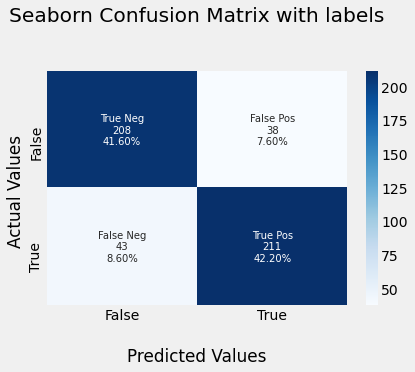

In [51]:
print("LogisticRegression with default values(penalty='l2', C=10.0, solver='lbfgs')")
classifier=train_model(linear_model.LogisticRegression(C=15.0), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)

LogisticRegression(solver='newton-cg',C=2.0)
LogisticRegression(C=2.0, solver='newton-cg')
Accuracy:  0.832


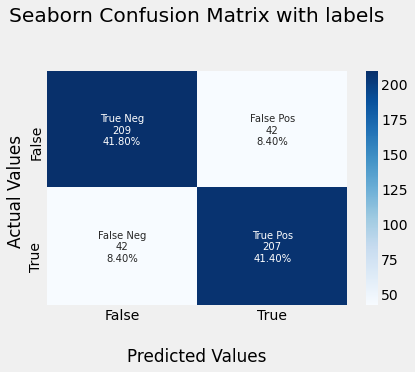

In [52]:
# LogisticRegression(solver='newton-cg')
print("LogisticRegression(solver='newton-cg',C=2.0)")
classifier=train_model(linear_model.LogisticRegression(solver='newton-cg',C=2.0), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)

LogisticRegression(solver='newton-cg',C=13.0)
LogisticRegression(C=13.0, solver='newton-cg')
Accuracy:  0.838


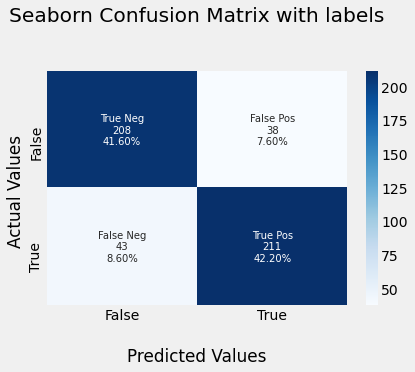

In [53]:
# LogisticRegression(solver='newton-cg')
print("LogisticRegression(solver='newton-cg',C=13.0)")
classifier=train_model(linear_model.LogisticRegression(solver='newton-cg',C=13.0), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)

LogisticRegression(solver='newton-cg',C=10.0)
LogisticRegression(C=10.0, solver='newton-cg')
Accuracy:  0.838


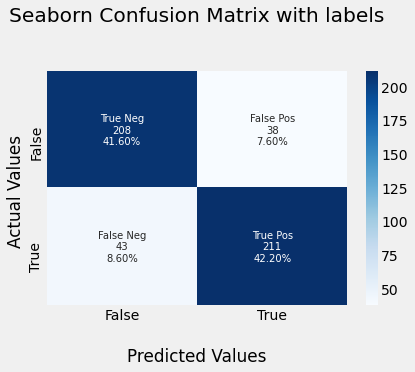

In [54]:
# LogisticRegression(solver='newton-cg')
print("LogisticRegression(solver='newton-cg',C=10.0)")
classifier=train_model(linear_model.LogisticRegression(solver='newton-cg',C=10.0), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)

LinearSVC()
Accuracy:  0.836


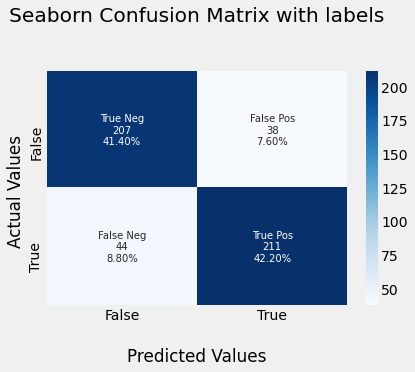

In [55]:
from sklearn.svm import LinearSVC
#LinearSVC()
classifier=train_model(LinearSVC(), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


KNeighborsClassifier(n_neighbors=3)
Accuracy:  0.668


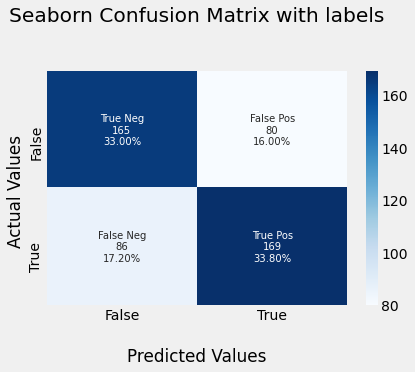

In [56]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier=train_model(KNeighborsClassifier(n_neighbors=3), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


KNeighborsClassifier(n_neighbors=7)
Accuracy:  0.676


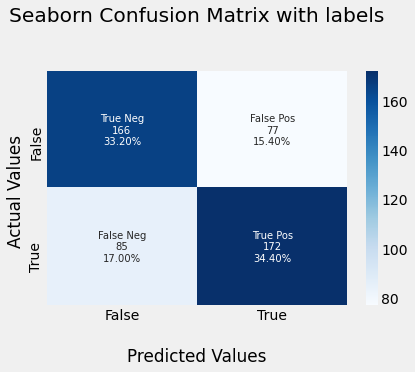

In [57]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier=train_model(KNeighborsClassifier(n_neighbors=7), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


RandomForestClassifier(n_estimators=150)
Accuracy:  0.794


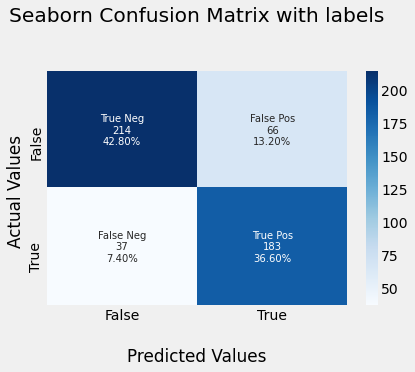

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier=train_model(RandomForestClassifier(n_estimators=150), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


SGDClassifier(max_iter=6)
Accuracy:  0.824


C:\Users\Nasser\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


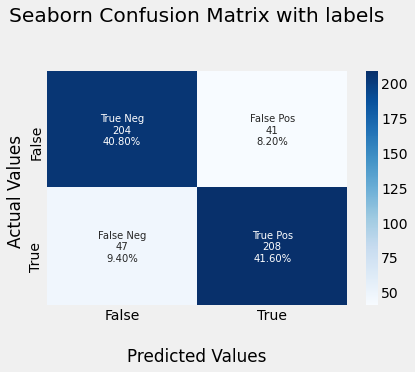

In [59]:
# SGDClassifier trained with the hinge loss, equivalent to a linear SVM.

from sklearn.linear_model import SGDClassifier
classifier=train_model(SGDClassifier(loss="hinge", penalty="l2", max_iter=6), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)


# LSTM CNN Classification

In [60]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [61]:
df=new_data
Y = df['label'].values

In [62]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['review'], Y, test_size=0.33)

In [63]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [64]:
from keras.models import Sequential
from keras.layers import LSTM


In [65]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 26942 unique tokens.


In [66]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (1340, 1325)


In [67]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (660, 1325)


In [68]:
# Create the model

# We get to choose embedding dimensionality
D = 20
i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [69]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=6,
  validation_data=(data_test, Ytest)
)

Model_Names.append('CNN_Sequential_Binary_Classification')
Model_Accuarcy.append(max(r.history['val_accuracy']))

Training model...
Epoch 1/6
42/42 [==============================] - 5s 89ms/step - loss: 0.6955 - accuracy: 0.4873 - val_loss: 0.6930 - val_accuracy: 0.5015
Epoch 2/6
42/42 [==============================] - 4s 83ms/step - loss: 0.6876 - accuracy: 0.5284 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/6
42/42 [==============================] - 4s 86ms/step - loss: 0.6786 - accuracy: 0.6134 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 4/6
42/42 [==============================] - 4s 85ms/step - loss: 0.6292 - accuracy: 0.7403 - val_loss: 0.6271 - val_accuracy: 0.6106
Epoch 5/6
42/42 [==============================] - 3s 81ms/step - loss: 0.2391 - accuracy: 0.9321 - val_loss: 0.5708 - val_accuracy: 0.7879
Epoch 6/6
42/42 [==============================] - 4s 87ms/step - loss: 0.0173 - accuracy: 0.9970 - val_loss: 0.6586 - val_accuracy: 0.7727


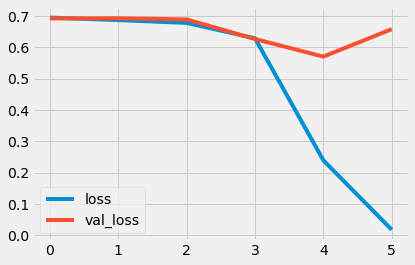

In [70]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

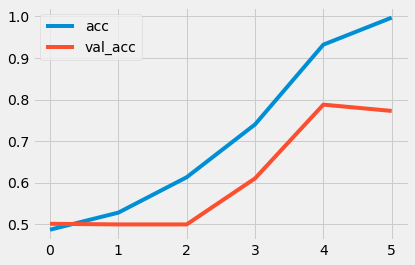

In [71]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [72]:
# Creating the model

# We get to choose embedding dimensionality
D = 20

# Hidden state dimensionality
M = 15

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [ ]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)
Model_Names.append('RNN_Sequential')
Model_Accuarcy.append(max(r.history['val_accuracy']))

Training model...
Epoch 1/10
42/42 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5037

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Data Visualization:

In [ ]:
import pandas as pd
dataframe=pd.DataFrame(Model_Names,columns=['Model']) 
dataframe['Accuracy']=Model_Accuarcy
dataframe.head()

In [ ]:
#Figure Size
data_sorted = dataframe.sort_values(by='Accuracy', ascending=True)
dataframe=data_sorted
name=dataframe['Model']
acc=dataframe['Accuracy']

fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, acc)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.5,
             str(round((i.get_width()), 5)),
             fontsize = 20, fontweight ='bold',
             color ='red')
 
# Add Plot Title
ax.set_title('Project NLP Accuracy',
             loc ='center', )
# Show Plot
plt.show()